In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import nltk

In [2]:
#load dataset
df=pd.read_csv("D:\\DATA SCIENCE\\ASSIGNMENTS\\Text Mining\\Elon_musk.csv")
df

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
df.shape

(1999, 2)

# Data cleaning and processing


In [5]:
df1=df.drop("Unnamed: 0", axis=1)
df1.head()

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [6]:
import re
from nltk.stem import PorterStemmer , WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

In [7]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
token = TweetTokenizer(strip_handles=True)

In [8]:
df2=[]
for i in range (0, len(df1)):
    data= token.tokenize(df1["Text"][i])
    data= " ".join(data)
    df2.append(data)

In [9]:
df2=pd.DataFrame(df2)
df2.columns= ["text"]
df2.head()

,text
0,I � m an alien
1,Ray tracing on Cyberpunk with HDR is next-leve...
2,Great interview !
3,Doge is underestimated
4,Congratulations Tesla China for amazing execut...


In [10]:
# Removing the unwanted URLs from the data
df3=[]
for i in range (0, len(df2)):
    data= re.sub(r'http\S+', ' ', df2["text"][i])
    data= "".join(data)
    df3.append(data)

In [11]:
df3=pd.DataFrame(df3)
df3.columns= ["text"]
df3.head()

,text
0,I � m an alien
1,Ray tracing on Cyberpunk with HDR is next-leve...
2,Great interview !
3,Doge is underestimated
4,Congratulations Tesla China for amazing execut...


In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in range(0, len(df3)):
    cleaned= re.sub('[^a-zA-Z]', " ", df3["text"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

In [14]:
# Removing some extra stop words
extra_stopwords=['haha',"c", "e", "ab", "fe","sn", "h", "v", "af", "mi", "w","mu","c","la", "un", "b", "yeah", "rt", "x","g","u", "f"]
data=[]
for i in range(0, len(df3)):
    cdata= corpus[i].split()
    cdata= [word for word in cdata if not word in extra_stopwords]
    cdata = " ".join(cdata)
    data.append(cdata)  

In [15]:
len(data)

1999

In [16]:
# removing empty rows
data1=[]
for i in range(0, len(data)):
    if data[i]!="":
        data1.append(data[i])

In [17]:
data1

['alien',
 'ray tracing cyberpunk hdr next level tried',
 'great interview',
 'doge underestimated',
 'congratulation tesla china amazing execution last year next even',
 'happy new year ox',
 'frodo underdoge thought would fail',
 'thanks',
 'indeed tweet definitely represent real world time allocation',
 'entertaining outcome likely',
 'sent',
 'agree clubhouse',
 'getting real',
 'bought dogecoin lil toddler hodler',
 'definitely issue sentencing seems bit high',
 'thanks fixing',
 'please unlock account',
 'true power',
 'crypto wallet give private key avoided cost',
 'app suck',
 'nasa selected falcon heavy launch first two element lunar gateway together one mission',
 'yes',
 'predict cash flow reasonably well starlink ipo',
 'starlink staggeringly difficult technical economic endeavor however',
 'spacex need pas deep chasm negative cash flow next year',
 'lowest cost per ton carbon sequestered net value product made must scalable',
 'meant price country difference tax shipping',

In [18]:
len(data1)

1810

In [19]:
joined_data= " ".join(data1)
print(joined_data)

alien ray tracing cyberpunk hdr next level tried great interview doge underestimated congratulation tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail thanks indeed tweet definitely represent real world time allocation entertaining outcome likely sent agree clubhouse getting real bought dogecoin lil toddler hodler definitely issue sentencing seems bit high thanks fixing please unlock account true power crypto wallet give private key avoided cost app suck nasa selected falcon heavy launch first two element lunar gateway together one mission yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pas deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable meant price country difference tax shipping intended earth may idea apply mar xprize team manage carbon capture prize everyone tesla receives stock com

# Applying bag of Words without N grams

In [20]:
# importing Pakages
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
bow= cv.fit_transform(data1).toarray()
print(cv.vocabulary_)

{'alien': 91, 'ray': 2342, 'tracing': 3028, 'cyberpunk': 694, 'hdr': 1328, 'next': 1941, 'level': 1659, 'tried': 3048, 'great': 1275, 'interview': 1530, 'doge': 822, 'underestimated': 3105, 'congratulation': 593, 'tesla': 2944, 'china': 495, 'amazing': 115, 'execution': 998, 'last': 1617, 'year': 3326, 'even': 973, 'happy': 1310, 'new': 1939, 'ox': 2063, 'frodo': 1171, 'underdoge': 3104, 'thought': 2972, 'would': 3311, 'fail': 1036, 'thanks': 2955, 'indeed': 1468, 'tweet': 3077, 'definitely': 733, 'represent': 2416, 'real': 2355, 'world': 3306, 'time': 2987, 'allocation': 94, 'entertaining': 943, 'outcome': 2043, 'likely': 1677, 'sent': 2575, 'agree': 74, 'clubhouse': 527, 'getting': 1229, 'bought': 360, 'dogecoin': 824, 'lil': 1678, 'toddler': 2996, 'hodler': 1374, 'issue': 1550, 'sentencing': 2576, 'seems': 2563, 'bit': 321, 'high': 1365, 'fixing': 1112, 'please': 2167, 'unlock': 3131, 'account': 29, 'true': 3056, 'power': 2201, 'crypto': 676, 'wallet': 3216, 'give': 1240, 'private':

In [21]:
bow= pd.DataFrame(bow)
bow

,0,1,2,3,4,5,6,7,8,9,...,3332,3333,3334,3335,3336,3337,3338,3339,3340,3341
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Applying bag of Words with N grams

In [22]:
cv_ngram=CountVectorizer(analyzer='word',ngram_range=(1,2),max_features=2000)
bow_ngram=cv_ngram.fit_transform(data1).toarray()

In [23]:
print(cv_ngram.vocabulary_)

{'alien': 36, 'ray': 1388, 'cyberpunk': 323, 'next': 1064, 'level': 828, 'tried': 1846, 'ray tracing': 1389, 'next level': 1067, 'great': 633, 'interview': 751, 'great interview': 638, 'doge': 390, 'congratulation': 276, 'tesla': 1773, 'china': 233, 'amazing': 49, 'last': 796, 'year': 1986, 'even': 470, 'next even': 1065, 'happy': 662, 'new': 1041, 'new year': 1056, 'thought': 1802, 'would': 1977, 'fail': 505, 'thought would': 1803, 'thanks': 1793, 'indeed': 731, 'tweet': 1863, 'definitely': 348, 'real': 1403, 'world': 1973, 'time': 1814, 'allocation': 37, 'real world': 1404, 'entertaining': 453, 'outcome': 1159, 'likely': 835, 'entertaining outcome': 454, 'outcome likely': 1160, 'sent': 1568, 'agree': 22, 'clubhouse': 242, 'getting': 601, 'bought': 157, 'dogecoin': 391, 'issue': 757, 'seems': 1557, 'bit': 135, 'high': 689, 'bit high': 136, 'please': 1226, 'true': 1850, 'power': 1242, 'crypto': 313, 'give': 607, 'private': 1261, 'key': 765, 'cost': 290, 'suck': 1718, 'nasa': 986, 'falc

In [24]:
bow_ngram.shape

(1810, 2000)

# Applying TF IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=2500, ngram_range=(1,3))
tfidf_df=tfidf.fit_transform(data1)

In [26]:
print(tfidf.vocabulary_)

{'alien': 37, 'ray': 1597, 'cyberpunk': 336, 'next': 1057, 'level': 864, 'tried': 2340, 'ray tracing': 1598, 'next level': 1058, 'great': 661, 'interview': 782, 'great interview': 667, 'doge': 405, 'congratulation': 285, 'tesla': 2265, 'china': 240, 'amazing': 50, 'last': 829, 'year': 2485, 'even': 489, 'happy': 691, 'new': 1050, 'thought': 2295, 'would': 2476, 'fail': 524, 'thought would': 2296, 'thanks': 2285, 'indeed': 762, 'tweet': 2357, 'definitely': 361, 'real': 1608, 'world': 2471, 'time': 2307, 'allocation': 38, 'entertaining': 471, 'outcome': 1117, 'likely': 871, 'entertaining outcome': 472, 'outcome likely': 1118, 'entertaining outcome likely': 473, 'sent': 2049, 'agree': 22, 'clubhouse': 249, 'getting': 628, 'bought': 160, 'dogecoin': 406, 'issue': 788, 'seems': 2038, 'bit': 138, 'high': 720, 'bit high': 139, 'please': 1187, 'true': 2344, 'power': 1203, 'crypto': 326, 'give': 634, 'private': 1222, 'key': 796, 'cost': 300, 'suck': 2210, 'nasa': 1030, 'falcon': 528, 'heavy': 7

# Using world cloud

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

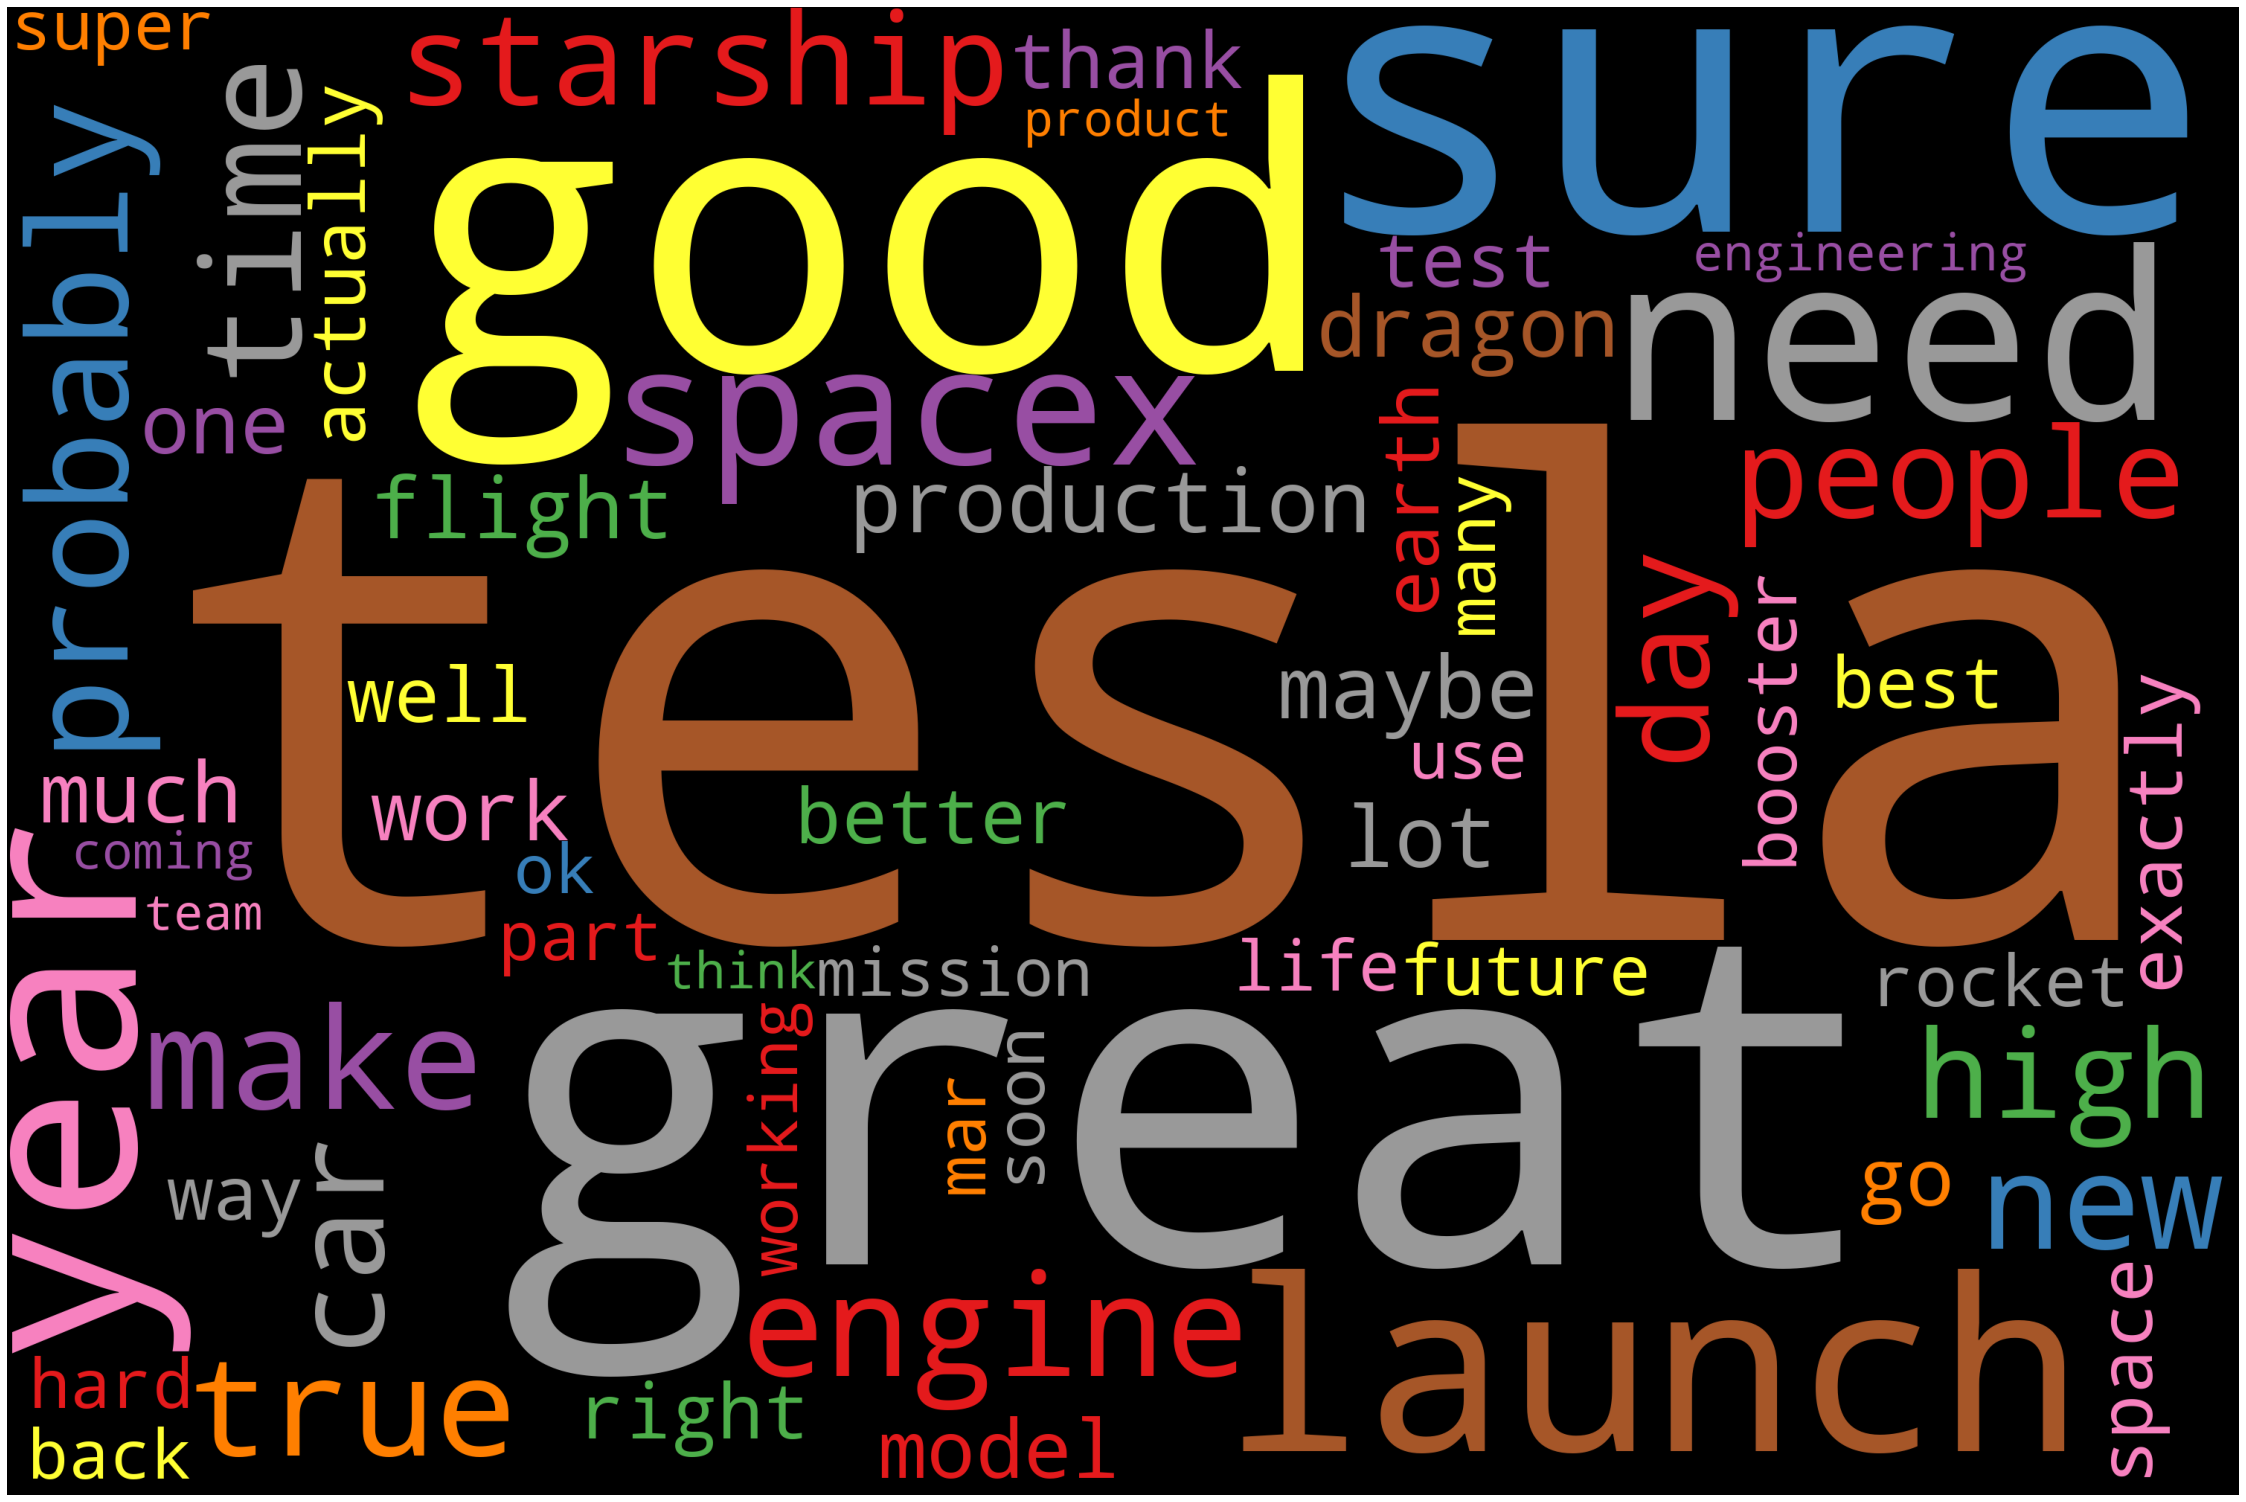

In [28]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud
STOPWORDS.add("ye")
STOPWORDS.add("even")
STOPWORDS.add("yes")
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=60,
                   colormap='Set1',stopwords=STOPWORDS).generate(joined_data)
plot_cloud(wordcloud)

# Sentiment Analysis

In [29]:
from afinn import Afinn

In [30]:
af= Afinn(language='en', emoticons=False, word_boundary=True)

In [31]:
af.scores("this apple bad and good")

[-3, 3]

In [33]:
# user Defined function to measure affinty scores
def score_cal(texts):
    score13=[]
    for i in range(0, len(texts)):
        sent_score13= 0
        words13= texts[i].split()
        for i in range(0, len(words13)):
            af_score13= af.score(words13[i])
            sent_score13 += af_score13
        score13.append(sent_score13)
    return score13

In [34]:
score=score_cal(data1)
score

[0.0,
 0.0,
 3.0,
 -1.0,
 6.0,
 3.0,
 -2.0,
 2.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 -2.0,
 2.0,
 1.0,
 2.0,
 -1.0,
 -3.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 -2.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -2.0,
 0.0,
 0.0,
 0.0,
 4.0,
 2.0,
 0.0,
 0.0,
 0.0,
 2.0,
 -3.0,
 0.0,
 0.0,
 0.0,
 4.0,
 1.0,
 0.0,
 2.0,
 2.0,
 1.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 3.0,
 -1.0,
 1.0,
 -2.0,
 0.0,
 0.0,
 4.0,
 -3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 4.0,
 1.0,
 1.0,
 1.0,
 7.0,
 0.0,
 0.0,
 3.0,
 -1.0,
 4.0,
 0.0,
 3.0,
 2.0,
 -1.0,
 0.0,
 1.0,
 3.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 0.0,
 3.0,
 -3.0,
 0.0,
 6.0,
 0.0,
 3.0,
 0.0,
 0.0,
 3.0,
 6.0,
 2.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 -2.0,
 -2.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 -2.0,
 -2.0,
 0.0,
 0.0,
 -1.0,
 1.0,
 0.0,
 3.0,
 0.0,
 4.0,
 

In [35]:
len(score)

1810

In [36]:
len(data1)

1810

In [37]:
sentiment_df= pd.DataFrame({"Tweets": data1, "Sentiment_val": score })
sentiment_df.head(5)

,Tweets,Sentiment_val
0,alien,0.0
1,ray tracing cyberpunk hdr next level tried,0.0
2,great interview,3.0
3,doge underestimated,-1.0
4,congratulation tesla china amazing execution l...,6.0


In [38]:
sentiment_df[sentiment_df["Sentiment_val"]>0].sort_values(by= "Sentiment_val" , ascending=False).head(10)
Positive =sentiment_df[sentiment_df["Sentiment_val"]>0]
Positive

,Tweets,Sentiment_val
2,great interview,3.0
4,congratulation tesla china amazing execution l...,6.0
5,happy new year ox,3.0
7,thanks,2.0
9,entertaining outcome likely,2.0
...,...,...
1799,sure great terrifying everything ever sensed t...,3.0
1800,yes,1.0
1801,sorry hopefully soon,1.0
1806,make sure read ur term condition clicking accept,1.0


In [39]:
Positive["Sentiment_val"].mean()

2.5426997245179064

In [40]:
sentiment_df[sentiment_df["Sentiment_val"]<0].sort_values(by= "Sentiment_val" , ascending=True).head(10)
negative = sentiment_df[sentiment_df["Sentiment_val"]<0]
negative

,Tweets,Sentiment_val
3,doge underestimated,-1.0
6,frodo underdoge thought would fail,-2.0
14,definitely issue sentencing seems bit high,-2.0
18,crypto wallet give private key avoided cost,-1.0
19,app suck,-3.0
...,...,...
1790,earning power post augmentation would easily pay,-1.0
1802,actually payout vesting stock option may never...,-1.0
1803,easy way answer tweet helping dire brain injur...,-2.0
1805,true sound surreal negative propaganda still e...,-1.0


In [41]:
negative["Sentiment_val"].mean()

-2.045685279187817

<AxesSubplot:ylabel='Sentiment_val'>

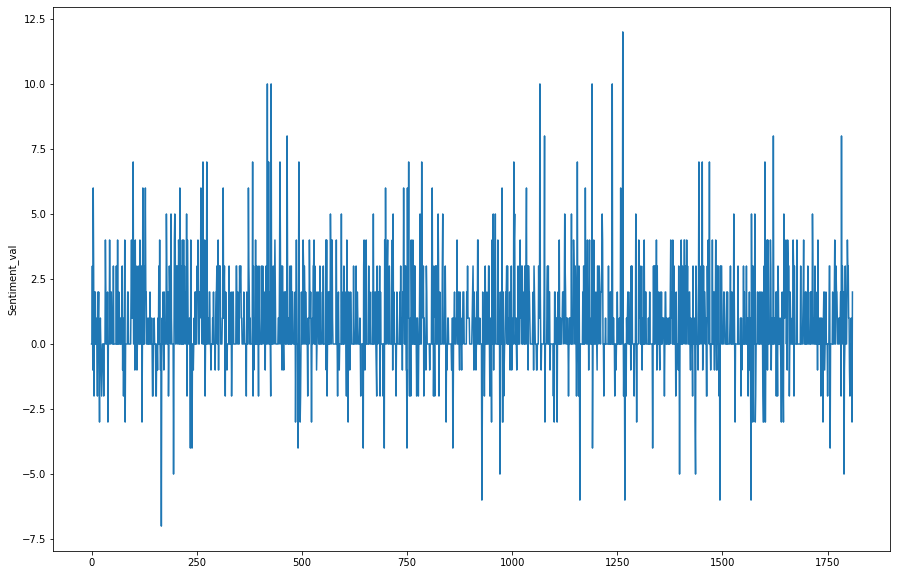

In [42]:
plt.figure(figsize=(15,10))
sns.lineplot(y="Sentiment_val",x=range(0,1810), data=sentiment_df)

<AxesSubplot:xlabel='Sentiment_val', ylabel='Count'>

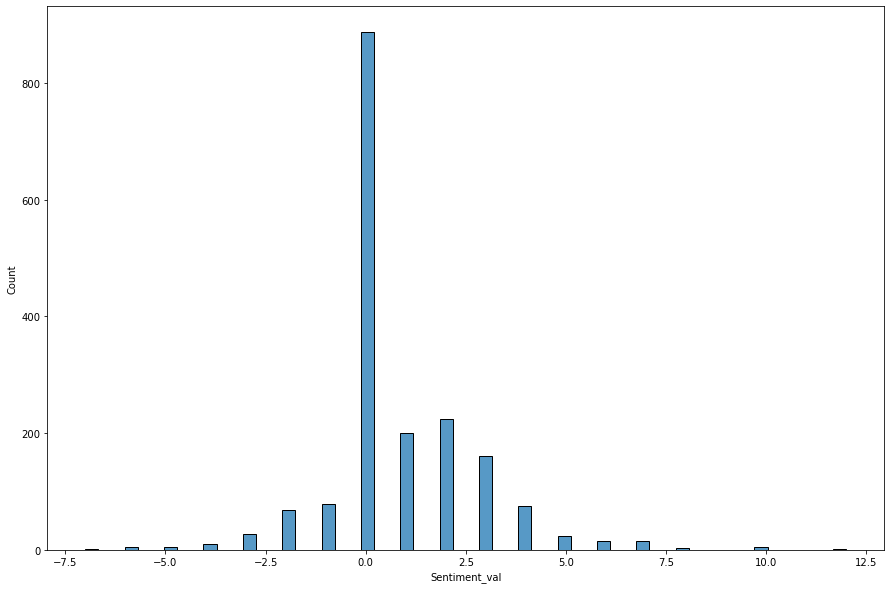

In [43]:
plt.figure(figsize=(15,10))
sns.histplot(sentiment_df["Sentiment_val"])